# **klasifikasi berita dengan ekstraksi fitur model topik modelling dengan classifier naïve bayes dan SVM**

In [ ]:
!pip install gensim

In [ ]:
!pip install gensim matplotlib seaborn scikit-learn pandas numpy

In [ ]:
!pip install umap-learn

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from gensim import corpora, models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Download stopword bahasa Indonesia
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Baca data
df_path = "/content/drive/MyDrive/PPW/UTS/Berita.csv"
df = pd.read_csv(df_path)

# Cek kolom
df.head(20)

,No,judul,berita,tanggal,kategori,link
0,1,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,Menteri Koordinator (Menko) Bidang Perekonomia...,"Minggu, 01 Des 2024 23:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
1,2,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","Minggu, 01 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
2,3,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,Wacana Presiden Prabowo Subianto akan membentu...,"Minggu, 01 Des 2024 19:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
3,4,Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"Minggu, 01 Des 2024 19:03 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
4,5,Pemerintah Segera Bentuk Satgas PHK Usai Tetap...,Pemerintah akan segera membentuk Satuan Tugas ...,"Minggu, 01 Des 2024 19:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
5,6,AHY Buka-bukaan Nasib Kelanjutan Pembangunan I...,Menko Bidang Infrastruktur dan Pembangunan Kew...,"Minggu, 01 Des 2024 18:20 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
6,7,Badan Gizi Soal Biaya Makan Gratis Rp10 Ribu: ...,Kepala Badan Gizi Nasional Dadan Hindayana men...,"Senin, 02 Des 2024 21:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412022...
7,8,Zulhas Minta Tambahan Anggaran Rp510 M Demi Ca...,Menteri Koordinator Bidang Pangan Zulkifli Has...,"Senin, 02 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412021...
8,9,PLN Akan Uji Coba PLTS IKN 22 Desember,Uji coba alias commissioning pembangkit listri...,"Senin, 02 Des 2024 20:20 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412021...
9,10,"Profil Jhony Saputra, Anak Haji Isam yang Jadi...",Anak crazy rich pengusaha sawit Kalimantan Sam...,"Senin, 02 Des 2024 20:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412021...


In [ ]:
df['text'] = df['judul'].astype(str) + " " + df['berita'].astype(str)
print("Contoh teks gabungan:\n")
print(df['text'].iloc[0])

Contoh teks gabungan:

Airlangga Harap Kenaikan UMP Tingkatkan Daya Beli Masyarakat Menengah Menteri Koordinator (Menko) Bidang Perekonomian Airlangga Hartarto berharap kenaikan upah minimum provinsi (UMP) sebesar 6,5 persen pada tahun 2025 bisa meningkatkan daya beli masyarakat kelas menengah."Oleh karena itu, sebagai start awal untuk menunjang daya beli mereka (masyarakat kelas menengah) maka kenaikan upah minimumnya didongkrak ke 6,5 persen," kata Airlangga di sela menghadiri Rapat Pimpinan Nasional (Rapimnas) Kadin 2024 di Jakarta, Minggu.Dia menyampaikan di tengah ketidakpastian global, pemerintah harus memperkuat struktur perekonomian dalam negeri. Salah satu struktur tersebut adalah kegiatan belanja kelompok masyarakat kelas menengah. Airlangga menuturkan kelompok masyarakat kelas menengah memiliki peran vital untuk mendorong komponen konsumsi. Konsumsi selama ini masih menjadi penopang terbesar pertumbuhan ekonomi nasional.Pemerintah Segera Bentuk Satgas PHK Usai Tetapkan UMP N

Cleaning text

In [ ]:
def clean_text(text):
    # ubah ke huruf kecil
    text = text.lower()
    # hilangkan karakter selain huruf
    text = re.sub(r'[^a-z\s]', '', text)
    # hapus stopword
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Terapkan fungsi ke kolom text
df['clean_text'] = df['text'].apply(clean_text)

# Tampilkan hasil
df[['judul', 'clean_text']].head(3)

,judul,clean_text
0,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,airlangga harap kenaikan ump tingkatkan daya b...
1,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,pt sier penghargaan tenant terbaik hut rangka ...
2,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,prabowo bentuk kementerian penerimaan negara d...


Tokenisasi

In [ ]:
texts = [row.split() for row in df['clean_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

print("Jumlah dokumen:", len(corpus))
print("Kata unik dalam kamus:", len(dictionary))

Jumlah dokumen: 1500
Kata unik dalam kamus: 37206


Model LDA

In [ ]:
num_topics = 120  # jumlah topik, bisa disesuaikan
lda_model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Tampilkan daftar topik
for idx, topic in lda_model.print_topics(-1):
    print(f"Topik {idx+1}:\n{topic}\n")

Topik 1:
0.025*"umkm" + 0.013*"indonesia" + 0.008*"mesir" + 0.008*"usaha" + 0.007*"pelaku" + 0.007*"tim" + 0.007*"bpom" + 0.006*"sertifikasi" + 0.006*"pangan" + 0.006*"suriah"

Topik 2:
0.017*"erupsi" + 0.016*"prabowo" + 0.015*"gunung" + 0.011*"semeru" + 0.010*"persen" + 0.009*"golkar" + 0.009*"wib" + 0.009*"korut" + 0.009*"letusan" + 0.008*"besuk"

Topik 3:
0.011*"pajak" + 0.010*"rp" + 0.009*"opsen" + 0.008*"kendaraan" + 0.008*"persen" + 0.007*"pkb" + 0.007*"bermotor" + 0.006*"kek" + 0.006*"salah" + 0.006*"bbnkb"

Topik 4:
0.025*"palestina" + 0.014*"negara" + 0.013*"israel" + 0.010*"warga" + 0.009*"rumah" + 0.007*"orang" + 0.006*"gaza" + 0.006*"mengakui" + 0.005*"oktober" + 0.005*"sandera"

Topik 5:
0.011*"suriah" + 0.008*"kur" + 0.007*"kamp" + 0.007*"visa" + 0.007*"serangan" + 0.007*"kelompok" + 0.006*"orang" + 0.005*"perceraian" + 0.005*"kerja" + 0.005*"golden"

Topik 6:
0.020*"pelecehan" + 0.016*"korban" + 0.016*"bandung" + 0.010*"kota" + 0.009*"diduga" + 0.009*"orang" + 0.009*"bra

Setiap dokumen menjadi vektor topik

In [ ]:
num_topics = 120
lda_model = models.LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,
    random_state=42
)

def get_topic_vector(lda_model, corpus):
    topic_features = []
    for doc in corpus:
        topic_dist = [0] * lda_model.num_topics
        for topic_id, prob in lda_model.get_document_topics(doc):
            topic_dist[topic_id] = prob
        topic_features.append(topic_dist)
    return np.array(topic_features)

X_topics = get_topic_vector(lda_model, corpus)
print("Bentuk matriks fitur:", X_topics.shape)

topic_cols = [f"Topik_{i+1}" for i in range(num_topics)]
df_topics = pd.DataFrame(X_topics, columns=topic_cols)
df_final = pd.concat([df[['judul', 'kategori']], df_topics], axis=1)

print(df_final.head())

Bentuk matriks fitur: (1500, 120)
                                               judul kategori  Topik_1  \
0  Airlangga Harap Kenaikan UMP Tingkatkan Daya B...  Ekonomi      0.0   
1  PT SIER Beri Penghargaan untuk 50 Tenant Terba...  Ekonomi      0.0   
2  Prabowo Bakal Bentuk Kementerian Penerimaan Ne...  Ekonomi      0.0   
3  Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...  Ekonomi      0.0   
4  Pemerintah Segera Bentuk Satgas PHK Usai Tetap...  Ekonomi      0.0   

   Topik_2  Topik_3  Topik_4  Topik_5  Topik_6  Topik_7  Topik_8  ...  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  ...   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0  ...   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0  ...   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0  ...   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0  ...   

   Topik_111  Topik_112  Topik_113  Topik_114  Topik_115  Topik_116  \
0        0.

In [61]:
num_topics = 132
lda_model = models.LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,
    random_state=42
)


def get_topic_vector(lda_model, corpus):
    topic_features = []
    for doc in corpus:
        topic_dist = [0] * lda_model.num_topics
        for topic_id, prob in lda_model.get_document_topics(doc):
            topic_dist[topic_id] = prob
        topic_features.append(topic_dist)
    return np.array(topic_features)

X_topics = get_topic_vector(lda_model, corpus)
print("Bentuk matriks fitur:", X_topics.shape)  # Harus (1500, 132)

y = df['kategori']

nb = MultinomialNB()
nb.fit(X_topics, y)
y_pred_nb = nb.predict(X_topics)

print("\n=== HASIL KLASIFIKASI: NAÏVE BAYES ===")
print("Akurasi Naïve Bayes:", round(accuracy_score(y, y_pred_nb) * 100, 2), "%")
print(classification_report(y, y_pred_nb))

# ======================================================
# 9. Klasifikasi SVM (Linear Support Vector Machine)
# ======================================================
svm = LinearSVC(random_state=42)
svm.fit(X_topics, y)
y_pred_svm = svm.predict(X_topics)

print("\n=== HASIL KLASIFIKASI: SVM ===")
print("Akurasi SVM:", round(accuracy_score(y, y_pred_svm) * 100, 2), "%")
print(classification_report(y, y_pred_svm))

# ======================================================
# 10. Gabungkan ke DataFrame dan Simpan
# ======================================================
topic_cols = [f"Topik_{i+1}" for i in range(num_topics)]
df_topics = pd.DataFrame(X_topics, columns=topic_cols)

df_final = pd.concat([df[['judul', 'kategori']], df_topics], axis=1)
df_final['Prediksi_NB'] = y_pred_nb
df_final['Prediksi_SVM'] = y_pred_svm

print("\nJumlah data akhir:", df_final.shape)
print(df_final.head())

# Simpan ke Google Drive
df_final.to_csv('/content/drive/MyDrive/PPW/UTS/hasil_klasifikasi_132topik.csv', index=False)
print("\n✅ File 'hasil_klasifikasi_132topik.csv' berhasil disimpan di Google Drive.")

Bentuk matriks fitur: (1500, 132)

=== HASIL KLASIFIKASI: NAÏVE BAYES ===
Akurasi Naïve Bayes: 79.8 %
               precision    recall  f1-score   support

      Ekonomi       0.74      0.76      0.75       375
Internasional       0.84      0.80      0.82       375
     Nasional       0.76      0.69      0.73       375
     Olahraga       0.84      0.94      0.89       375

     accuracy                           0.80      1500
    macro avg       0.80      0.80      0.80      1500
 weighted avg       0.80      0.80      0.80      1500


=== HASIL KLASIFIKASI: SVM ===
Akurasi SVM: 83.33 %
               precision    recall  f1-score   support

      Ekonomi       0.76      0.80      0.78       375
Internasional       0.90      0.82      0.86       375
     Nasional       0.77      0.77      0.77       375
     Olahraga       0.90      0.95      0.92       375

     accuracy                           0.83      1500
    macro avg       0.83      0.83      0.83      1500
 weighted avg  

In [62]:
num_topics = 148
lda_model = models.LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,
    random_state=42
)

# ======================================================
# 6. Ubah Dokumen ke Vektor Topik
# ======================================================
def get_topic_vector(lda_model, corpus):
    topic_features = []
    for doc in corpus:
        topic_dist = [0] * lda_model.num_topics
        for topic_id, prob in lda_model.get_document_topics(doc):
            topic_dist[topic_id] = prob
        topic_features.append(topic_dist)
    return np.array(topic_features)

X_topics = get_topic_vector(lda_model, corpus)
print("Bentuk matriks fitur:", X_topics.shape)  # Harus (1500, 148)

# ======================================================
# 7. Ambil Label Target
# ======================================================
y = df['kategori']

# ======================================================
# 8. Klasifikasi Naïve Bayes
# ======================================================
nb = MultinomialNB()
nb.fit(X_topics, y)
y_pred_nb = nb.predict(X_topics)

print("\n=== HASIL KLASIFIKASI: NAÏVE BAYES ===")
print("Akurasi Naïve Bayes:", round(accuracy_score(y, y_pred_nb) * 100, 2), "%")
print(classification_report(y, y_pred_nb))

# ======================================================
# 9. Klasifikasi SVM (Linear Support Vector Machine)
# ======================================================
svm = LinearSVC(random_state=42)
svm.fit(X_topics, y)
y_pred_svm = svm.predict(X_topics)

print("\n=== HASIL KLASIFIKASI: SVM ===")
print("Akurasi SVM:", round(accuracy_score(y, y_pred_svm) * 100, 2), "%")
print(classification_report(y, y_pred_svm))

# ======================================================
# 10. Gabungkan ke DataFrame dan Simpan
# ======================================================
topic_cols = [f"Topik_{i+1}" for i in range(num_topics)]
df_topics = pd.DataFrame(X_topics, columns=topic_cols)

df_final = pd.concat([df[['judul', 'kategori']], df_topics], axis=1)
df_final['Prediksi_NB'] = y_pred_nb
df_final['Prediksi_SVM'] = y_pred_svm

print("\nJumlah data akhir:", df_final.shape)
print(df_final.head())

# Simpan ke Google Drive
df_final.to_csv('/content/drive/MyDrive/PPW/UTS/hasil_klasifikasi_148topik.csv', index=False)
print("\n✅ File 'hasil_klasifikasi_148topik.csv' berhasil disimpan di Google Drive.")

Bentuk matriks fitur: (1500, 148)

=== HASIL KLASIFIKASI: NAÏVE BAYES ===
Akurasi Naïve Bayes: 80.6 %
               precision    recall  f1-score   support

      Ekonomi       0.76      0.78      0.77       375
Internasional       0.83      0.79      0.81       375
     Nasional       0.74      0.70      0.72       375
     Olahraga       0.89      0.95      0.92       375

     accuracy                           0.81      1500
    macro avg       0.80      0.81      0.80      1500
 weighted avg       0.80      0.81      0.80      1500


=== HASIL KLASIFIKASI: SVM ===
Akurasi SVM: 83.33 %
               precision    recall  f1-score   support

      Ekonomi       0.79      0.82      0.81       375
Internasional       0.83      0.83      0.83       375
     Nasional       0.77      0.73      0.75       375
     Olahraga       0.93      0.96      0.94       375

     accuracy                           0.83      1500
    macro avg       0.83      0.83      0.83      1500
 weighted avg  


=== Jumlah topik: 120 ===
Akurasi Naïve Bayes: 0.7900
Akurasi SVM: 0.7933

=== Jumlah topik: 132 ===
Akurasi Naïve Bayes: 0.7867
Akurasi SVM: 0.8100

=== Jumlah topik: 148 ===
Akurasi Naïve Bayes: 0.7700
Akurasi SVM: 0.7733


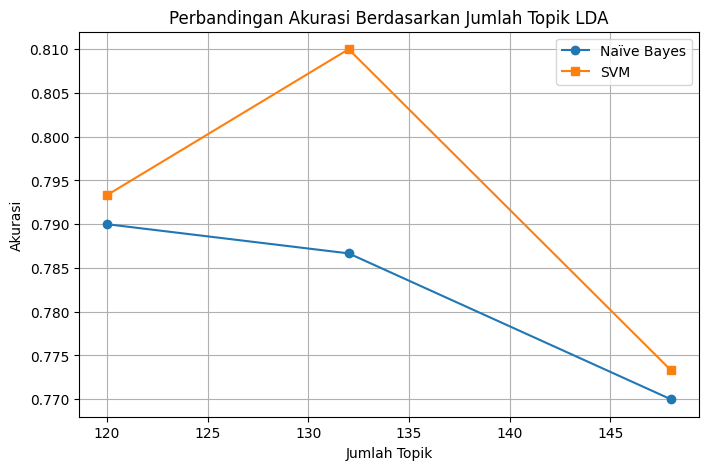


=== Ringkasan Akurasi ===
   Jumlah Topik  Akurasi Naïve Bayes  Akurasi SVM
0           120             0.790000     0.793333
1           132             0.786667     0.810000
2           148             0.770000     0.773333


In [63]:
def get_topic_vector(lda_model, corpus):
    topic_features = []
    for doc in corpus:
        topic_dist = [0] * lda_model.num_topics
        for topic_id, prob in lda_model.get_document_topics(doc):
            topic_dist[topic_id] = prob
        topic_features.append(topic_dist)
    return np.array(topic_features)


topic_nums = [120, 132, 148]
nb_scores = []
svm_scores = []

for n_topics in topic_nums:
    print(f"\n=== Jumlah topik: {n_topics} ===")
    lda_model = models.LdaModel(corpus, num_topics=n_topics, id2word=dictionary, passes=10, random_state=42)
    X_topics = get_topic_vector(lda_model, corpus)
    y = df['kategori']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_topics, y, test_size=0.2, random_state=42)

    # Naive Bayes
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)
    acc_nb = accuracy_score(y_test, y_pred_nb)
    nb_scores.append(acc_nb)

    # SVM
    svm = LinearSVC()
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    svm_scores.append(acc_svm)

    print(f"Akurasi Naïve Bayes: {acc_nb:.4f}")
    print(f"Akurasi SVM: {acc_svm:.4f}")

plt.figure(figsize=(8,5))
plt.plot(topic_nums, nb_scores, marker='o', label='Naïve Bayes')
plt.plot(topic_nums, svm_scores, marker='s', label='SVM')
plt.title('Perbandingan Akurasi Berdasarkan Jumlah Topik LDA')
plt.xlabel('Jumlah Topik')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)
plt.show()

hasil = pd.DataFrame({
    'Jumlah Topik': topic_nums,
    'Akurasi Naïve Bayes': nb_scores,
    'Akurasi SVM': svm_scores
})

print("\n=== Ringkasan Akurasi ===")
print(hasil)

Target(label berita)

In [ ]:
if 'kategori' not in df.columns:
    raise ValueError("Kolom 'kategori' tidak ditemukan di dataset.")
y = df['kategori']
print("Contoh label:", y.unique())

Contoh label: ['Ekonomi' 'Olahraga' 'Nasional' 'Internasional']


Klasifikasi NB

In [ ]:
nb = MultinomialNB()
nb.fit(X_topics, y)
y_pred_nb = nb.predict(X_topics)

print("=== Hasil Naïve Bayes ===")
print("Akurasi:", accuracy_score(y, y_pred_nb))
print(classification_report(y, y_pred_nb))

=== Hasil Naïve Bayes ===
Akurasi: 0.8113333333333334
               precision    recall  f1-score   support

      Ekonomi       0.74      0.84      0.79       375
Internasional       0.82      0.81      0.82       375
     Nasional       0.78      0.63      0.70       375
     Olahraga       0.90      0.96      0.93       375

     accuracy                           0.81      1500
    macro avg       0.81      0.81      0.81      1500
 weighted avg       0.81      0.81      0.81      1500



Klasifikasi SVM

In [ ]:
svm = LinearSVC()
svm.fit(X_topics, y)
y_pred_svm = svm.predict(X_topics)

print("=== Hasil SVM ===")
print("Akurasi:", accuracy_score(y, y_pred_svm))
print(classification_report(y, y_pred_svm))

=== Hasil SVM ===
Akurasi: 0.826
               precision    recall  f1-score   support

      Ekonomi       0.78      0.84      0.81       375
Internasional       0.83      0.82      0.82       375
     Nasional       0.76      0.70      0.73       375
     Olahraga       0.94      0.94      0.94       375

     accuracy                           0.83      1500
    macro avg       0.83      0.83      0.83      1500
 weighted avg       0.83      0.83      0.83      1500



In [ ]:
hasil = pd.DataFrame({
    'Judul': df['judul'],
    'Kategori_Asli': y,
    'Prediksi_NB': y_pred_nb,
    'Prediksi_SVM': y_pred_svm
})

hasil.to_csv('/content/drive/MyDrive/PPW/UTS/hasil_klasifikasi2_1500.csv', index=False)
print("✅ File hasil_klasifikasi_1500.csv berhasil disimpan di Google Drive.")

✅ File hasil_klasifikasi_1500.csv berhasil disimpan di Google Drive.
